# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

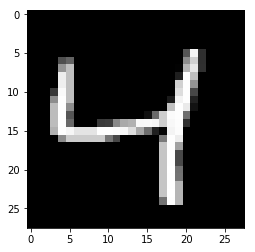

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)

# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6938
Epoch: 1/20... Training loss: 0.6907
Epoch: 1/20... Training loss: 0.6871
Epoch: 1/20... Training loss: 0.6836
Epoch: 1/20... Training loss: 0.6790
Epoch: 1/20... Training loss: 0.6733
Epoch: 1/20... Training loss: 0.6669
Epoch: 1/20... Training loss: 0.6574
Epoch: 1/20... Training loss: 0.6468
Epoch: 1/20... Training loss: 0.6375
Epoch: 1/20... Training loss: 0.6238
Epoch: 1/20... Training loss: 0.6095
Epoch: 1/20... Training loss: 0.5986
Epoch: 1/20... Training loss: 0.5795
Epoch: 1/20... Training loss: 0.5624
Epoch: 1/20... Training loss: 0.5435
Epoch: 1/20... Training loss: 0.5251
Epoch: 1/20... Training loss: 0.5086
Epoch: 1/20... Training loss: 0.4890
Epoch: 1/20... Training loss: 0.4705
Epoch: 1/20... Training loss: 0.4517
Epoch: 1/20... Training loss: 0.4334
Epoch: 1/20... Training loss: 0.4153
Epoch: 1/20... Training loss: 0.3998
Epoch: 1/20... Training loss: 0.3911
Epoch: 1/20... Training loss: 0.3758
Epoch: 1/20... Training loss: 0.3673
E

Epoch: 1/20... Training loss: 0.1973
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.2004
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1978
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1966
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1900
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1938
Epoch: 1/20... Training loss: 0.1890
Epoch: 1/20... Training loss: 0.1923
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1886
Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1868
Epoch: 1/20... Training loss: 0.1833
Epoch: 1/20... Training loss: 0.1899
Epoch: 1/20... Training loss: 0.1862
E

Epoch: 2/20... Training loss: 0.1576
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1612
Epoch: 2/20... Training loss: 0.1620
Epoch: 2/20... Training loss: 0.1616
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1605
Epoch: 2/20... Training loss: 0.1562
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1552
Epoch: 2/20... Training loss: 0.1551
Epoch: 2/20... Training loss: 0.1543
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1556
Epoch: 2/20... Training loss: 0.1606
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1641
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1609
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1591
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1610
Epoch: 2/20... Training loss: 0.1577
Epoch: 2/20... Training loss: 0.1537
E

Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1419
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1384
Epoch: 3/20... Training loss: 0.1378
Epoch: 3/20... Training loss: 0.1430
Epoch: 3/20... Training loss: 0.1391
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1364
Epoch: 3/20... Training loss: 0.1356
Epoch: 3/20... Training loss: 0.1438
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1351
Epoch: 3/20... Training loss: 0.1358
Epoch: 3/20... Training loss: 0.1379
Epoch: 3/20... Training loss: 0.1372
Epoch: 3/20... Training loss: 0.1402
Epoch: 3/20... Training loss: 0.1396
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1342
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1386
Epoch: 3/20... Training loss: 0.1320
Epoch: 3/20... Training loss: 0.1474
Epoch: 3/20... Training loss: 0.1327
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1298
E

Epoch: 3/20... Training loss: 0.1273
Epoch: 4/20... Training loss: 0.1302
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1291
Epoch: 4/20... Training loss: 0.1296
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1271
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1264
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1269
Epoch: 4/20... Training loss: 0.1247
Epoch: 4/20... Training loss: 0.1266
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1305
Epoch: 4/20... Training loss: 0.1286
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1254
Epoch: 4/20... Training loss: 0.1236
Epoch: 4/20... Training loss: 0.1305
E

Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1172
Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1177
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1192
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1185
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1160
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1184
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1209
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1182
E

Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1137
Epoch: 5/20... Training loss: 0.1085
Epoch: 5/20... Training loss: 0.1147
Epoch: 5/20... Training loss: 0.1157
Epoch: 5/20... Training loss: 0.1143
Epoch: 5/20... Training loss: 0.1110
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1133
Epoch: 5/20... Training loss: 0.1145
Epoch: 5/20... Training loss: 0.1116
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1153
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1128
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1118
E

Epoch: 6/20... Training loss: 0.1039
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.1083
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1087
Epoch: 6/20... Training loss: 0.1085
Epoch: 6/20... Training loss: 0.1125
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1082
Epoch: 6/20... Training loss: 0.1072
Epoch: 6/20... Training loss: 0.1065
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1052
Epoch: 6/20... Training loss: 0.1045
Epoch: 6/20... Training loss: 0.1060
Epoch: 6/20... Training loss: 0.1078
Epoch: 6/20... Training loss: 0.1070
Epoch: 6/20... Training loss: 0.1088
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1028
Epoch: 6/20... Training loss: 0.1063
E

Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.1050
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1000
Epoch: 7/20... Training loss: 0.1047
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1036
Epoch: 7/20... Training loss: 0.1034
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1054
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0991
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.1072
E

Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0967
Epoch: 7/20... Training loss: 0.1025
Epoch: 7/20... Training loss: 0.1003
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.1041
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1014
Epoch: 7/20... Training loss: 0.1016
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0984
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.0996
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.1023
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1000
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.1030
Epoch: 8/20... Training loss: 0.1035
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0974
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0944
E

Epoch: 9/20... Training loss: 0.0992
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0917
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0968
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0983
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0978
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.1027
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0931
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0996
Epoch: 9/20... Training loss: 0.0984
Epoch: 9/20... Training loss: 0.0979
E

Epoch: 9/20... Training loss: 0.0952
Epoch: 10/20... Training loss: 0.0962
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0981
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0954
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0983
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0995
Epoch: 10/20... Training loss: 0.0933
Epoch: 10/20... Training loss: 0.0921
Epoch: 10/20... Training loss: 0.0989
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20.

Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0946
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0969
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0953
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0906
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0928
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.1000
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0941
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0984
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0958
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0916
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0926
Epoch: 11/20... Training loss: 0.0955
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0906
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0963
Epoch: 11/20... Training loss: 0.0975
Epoch: 11/20... Training loss: 0.0931
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0974
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0910
Epoch: 12/20... Training loss: 0.0977
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0940
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0965
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0961
Epoch: 12/20... Training loss: 0.0941
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0960
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0952
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0968
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0978
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0921
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0892
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0958
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0908
Epoch: 13/20... Training loss: 0.0918
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0899
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0892
Epoch: 13/20... Training loss: 0.0897
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0915
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0905
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0942
Epoch: 14/20... Training loss: 0.0953
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0994
Epoch: 14/20... Training loss: 0.0974
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0902
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0986
Epoch: 14/20... Training loss: 0.0955
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0941
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0978
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0883
Epoch: 15/20... Training loss: 0.0968
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0983
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0890
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0907
Epoch: 15/20... Training loss: 0.0913
Epoch: 15/20... Training loss: 0.0889
Epoch: 15/20... Training loss: 0.0892
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0972
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0939
Epoch: 15/20... Training loss: 0.0911
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0963
Epoch: 15/20... Training loss: 0.0981
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0905
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0994
Epoch: 16/20... Training loss: 0.0997
Epoch: 16/20... Training loss: 0.0935
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0880
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0907
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0944
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20... Training loss: 0.0933
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0937
Epoch: 17/20... Training loss: 0.0923
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0944
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0941
Epoch: 18/20... Training loss: 0.0894
Epoch: 18/20... Training loss: 0.0961
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0895
Epoch: 18/20... Training loss: 0.0926
Epoch: 18/20... Training loss: 0.0898
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0904
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0910
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0901
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0946
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0969
Epoch: 18/20... Training loss: 0.0985
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0891
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0909
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0959
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0952
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0926
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0950
Epoch: 19/20... Training loss: 0.0899
Epoch: 19/20... Training loss: 0.0964
Epoch: 19/20... Training loss: 0.0905
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0913
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0973
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0913
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0952
Epoch: 20/20... Training loss: 0.0985
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0978
Epoch: 20/20... Training loss: 0.0961
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0912
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0944
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0917
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0915


## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

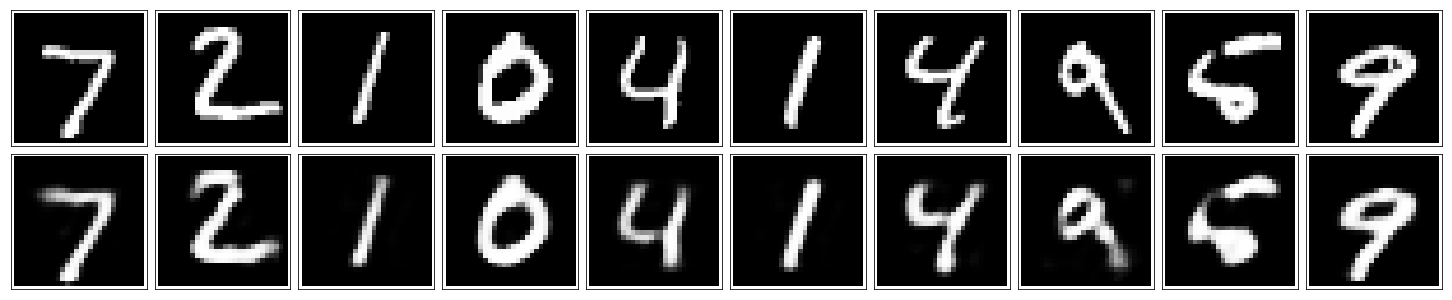

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.